# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

The goals / steps of this project are the following:
* Load the data set (see below for links to the project data set)
* Explore, summarize and visualize the data set
* Design, train and test a model architecture
* Use the model to make predictions on new images
* Analyze the softmax probabilities of the new images
* Visualize the neural network's state with test images

---
## Step 0: Import all the libraries and load the data

In [1]:
import pickle
from sklearn.utils import shuffle
import random
import csv
import scipy.ndimage
from skimage.transform import resize
from skimage.transform import rotate
import os

import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
if tf.__version__.startswith('2'):
    import tensorflow.compat.v1 as tf
    from tensorflow.compat.v1.layers import flatten
    tf.disable_eager_execution()
    tf.disable_v2_behavior()
else:
    from tensorflow.contrib.layers import flatten
    

import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
# Load pickled data
# Read training data, validation data, and testing data
training_file = './traffic-signs-data/train.p'
validation_file = './traffic-signs-data/valid.p'
testing_file = './traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']

In [3]:
sign_names = [''] * np.unique(train['labels']).shape[0]
with open('signnames.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            pass
        else:
            sign_names[int(row[0])] = row[1]
        line_count = line_count + 1

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [4]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

n_train = train['features'].shape[0]
n_validation = valid['features'].shape[0]
n_test = test['features'].shape[0]

image_shape = train['features'].shape[1:]

n_classes = np.unique(train['labels']).shape[0]

# print basic summary
print('Number of training examples =', n_train)
print('Number of valid examples =', n_validation)
print('Number of testing examples =', n_test)
print('Image data shape =', image_shape)
print('Range of data=({} - {})'.format(np.min(train['features']), np.max(train['features'])))
print('Number of classes =', n_classes)
print('All sign names =')

for index, sign_name in enumerate(sign_names):
    print('\t{}. {}'.format(index+1, sign_name))

Number of training examples = 34799
Number of valid examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Range of data=(0 - 255)
Number of classes = 43
All sign names =
	1. Speed limit (20km/h)
	2. Speed limit (30km/h)
	3. Speed limit (50km/h)
	4. Speed limit (60km/h)
	5. Speed limit (70km/h)
	6. Speed limit (80km/h)
	7. End of speed limit (80km/h)
	8. Speed limit (100km/h)
	9. Speed limit (120km/h)
	10. No passing
	11. No passing for vehicles over 3.5 metric tons
	12. Right-of-way at the next intersection
	13. Priority road
	14. Yield
	15. Stop
	16. No vehicles
	17. Vehicles over 3.5 metric tons prohibited
	18. No entry
	19. General caution
	20. Dangerous curve to the left
	21. Dangerous curve to the right
	22. Double curve
	23. Bumpy road
	24. Slippery road
	25. Road narrows on the right
	26. Road work
	27. Traffic signals
	28. Pedestrians
	29. Children crossing
	30. Bicycles crossing
	31. Beware of ice/snow
	32. Wild animals crossing
	33. End of all spee

### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

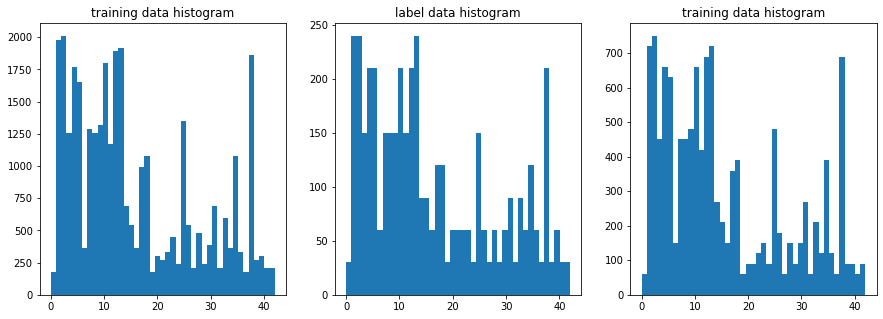

In [5]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
# Visualizations will be shown in the notebook.

fig = plt.figure(figsize=(15,5))

fig.add_subplot(1, 3, 1)
plt.hist(train['labels'], bins=n_classes)
plt.title("training data histogram")
fig.add_subplot(1, 3, 2)
plt.hist(valid['labels'], bins=n_classes)
plt.title("label data histogram")
fig.add_subplot(1, 3, 3)
plt.hist(test['labels'], bins=n_classes)
plt.title("training data histogram")
plt.show()

Class 0: Speed limit (20km/h), Training Sample Count: 180


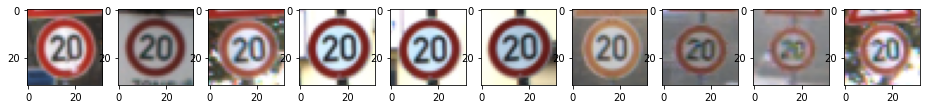

Class 1: Speed limit (30km/h), Training Sample Count: 1980


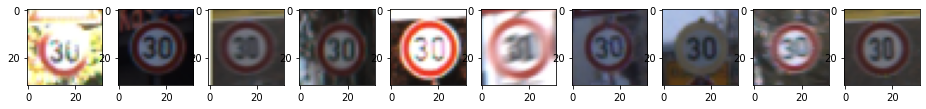

Class 2: Speed limit (50km/h), Training Sample Count: 2010


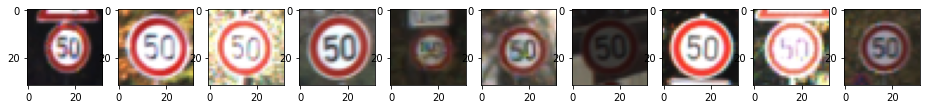

Class 3: Speed limit (60km/h), Training Sample Count: 1260


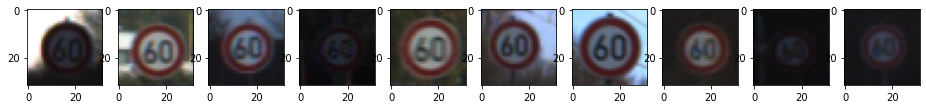

Class 4: Speed limit (70km/h), Training Sample Count: 1770


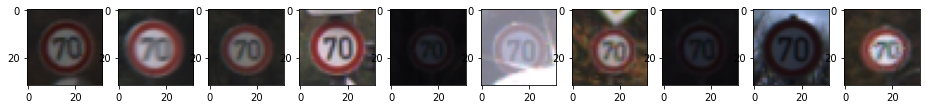

Class 5: Speed limit (80km/h), Training Sample Count: 1650


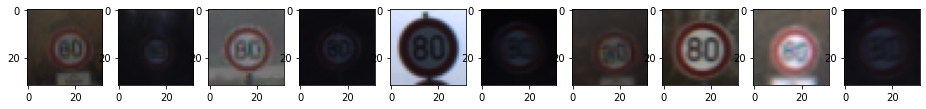

Class 6: End of speed limit (80km/h), Training Sample Count: 360


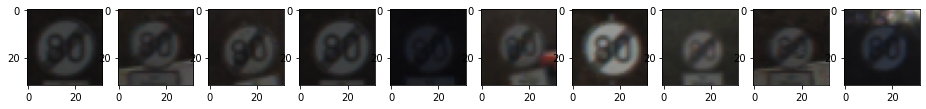

Class 7: Speed limit (100km/h), Training Sample Count: 1290


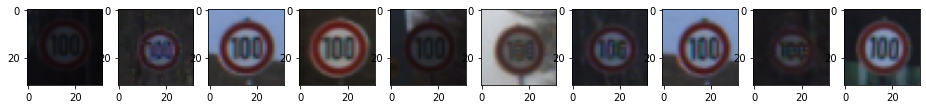

Class 8: Speed limit (120km/h), Training Sample Count: 1260


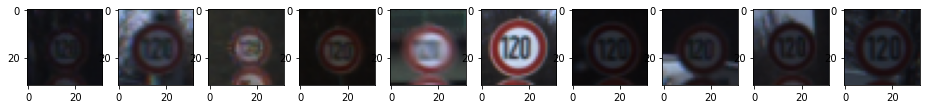

Class 9: No passing, Training Sample Count: 1320


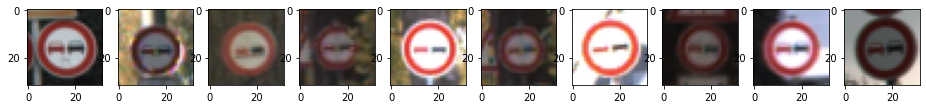

Class 10: No passing for vehicles over 3.5 metric tons, Training Sample Count: 1800


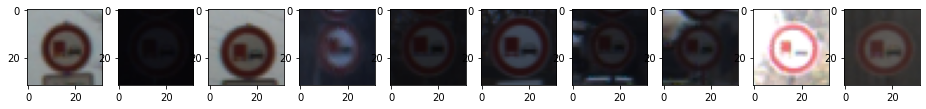

Class 11: Right-of-way at the next intersection, Training Sample Count: 1170


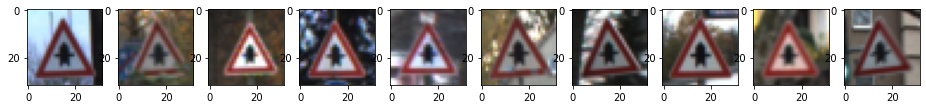

Class 12: Priority road, Training Sample Count: 1890


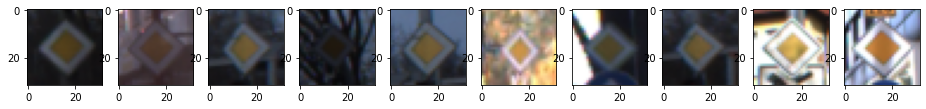

Class 13: Yield, Training Sample Count: 1920


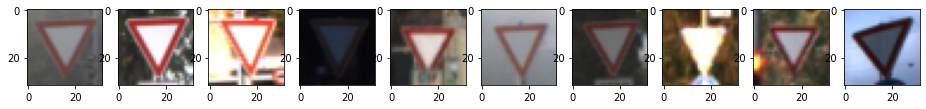

Class 14: Stop, Training Sample Count: 690


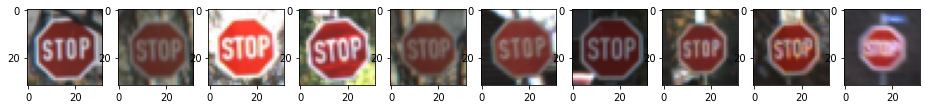

Class 15: No vehicles, Training Sample Count: 540


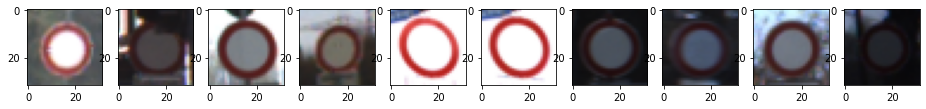

Class 16: Vehicles over 3.5 metric tons prohibited, Training Sample Count: 360


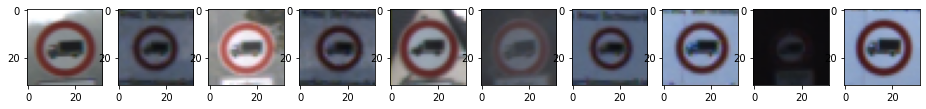

Class 17: No entry, Training Sample Count: 990


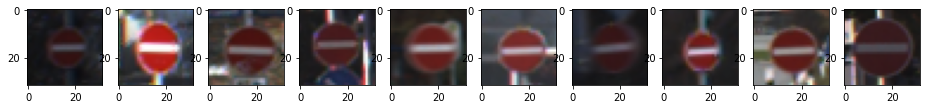

Class 18: General caution, Training Sample Count: 1080


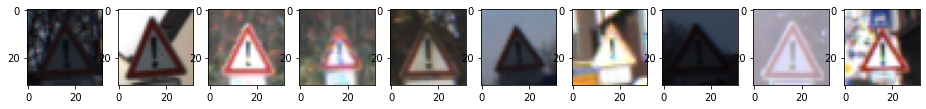

Class 19: Dangerous curve to the left, Training Sample Count: 180


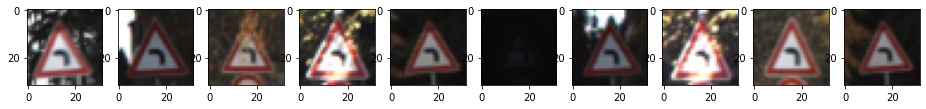

Class 20: Dangerous curve to the right, Training Sample Count: 300


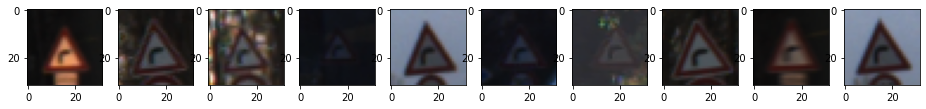

Class 21: Double curve, Training Sample Count: 270


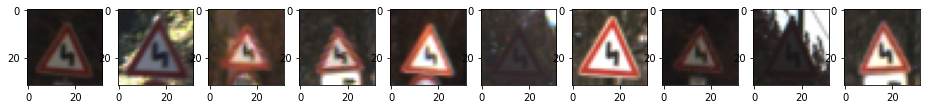

Class 22: Bumpy road, Training Sample Count: 330


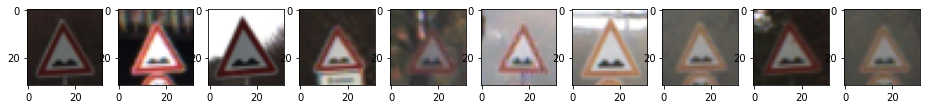

Class 23: Slippery road, Training Sample Count: 450


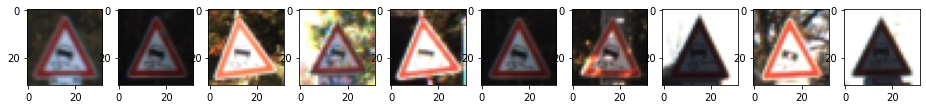

Class 24: Road narrows on the right, Training Sample Count: 240


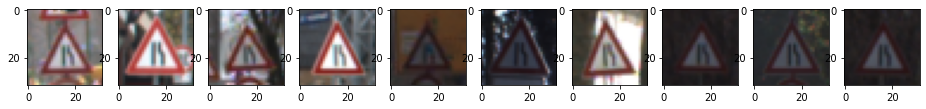

Class 25: Road work, Training Sample Count: 1350


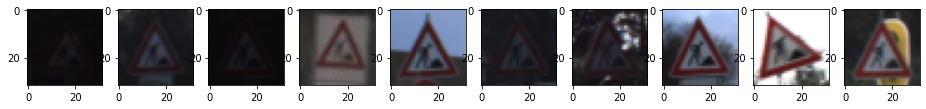

Class 26: Traffic signals, Training Sample Count: 540


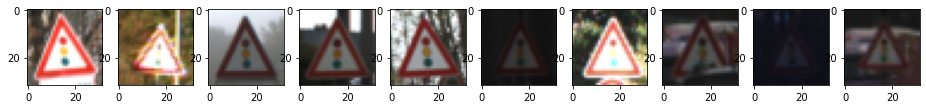

Class 27: Pedestrians, Training Sample Count: 210


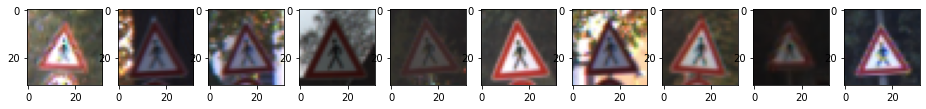

Class 28: Children crossing, Training Sample Count: 480


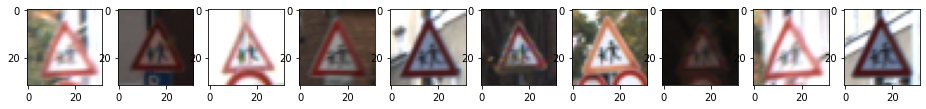

Class 29: Bicycles crossing, Training Sample Count: 240


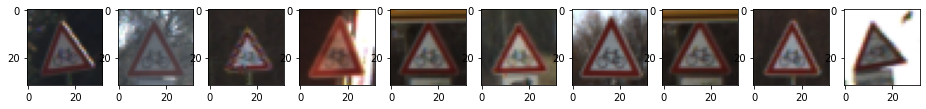

Class 30: Beware of ice/snow, Training Sample Count: 390


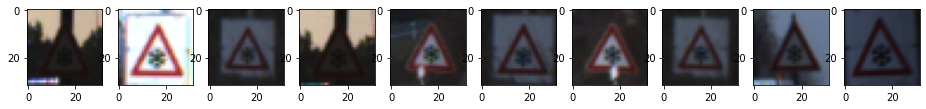

Class 31: Wild animals crossing, Training Sample Count: 690


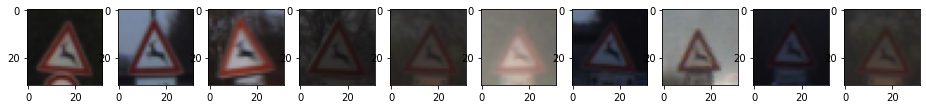

Class 32: End of all speed and passing limits, Training Sample Count: 210


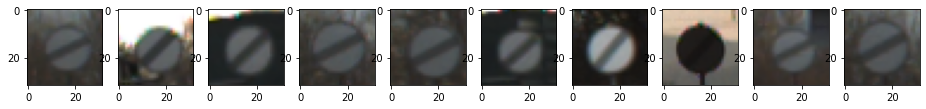

Class 33: Turn right ahead, Training Sample Count: 599


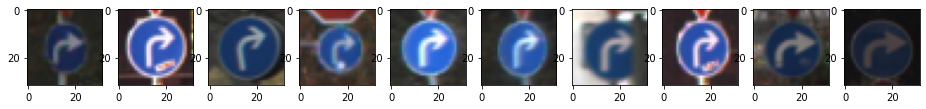

Class 34: Turn left ahead, Training Sample Count: 360


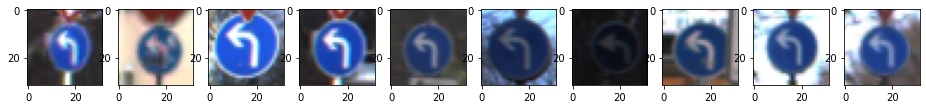

Class 35: Ahead only, Training Sample Count: 1080


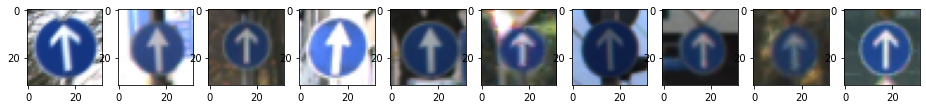

Class 36: Go straight or right, Training Sample Count: 330


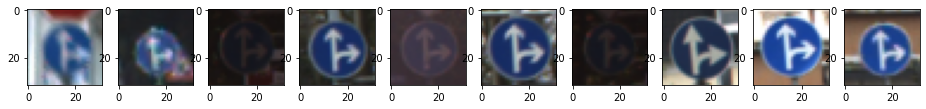

Class 37: Go straight or left, Training Sample Count: 180


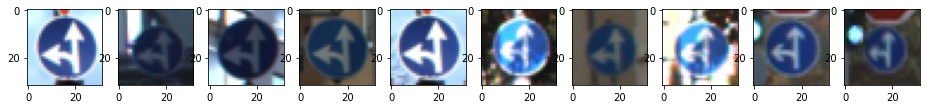

Class 38: Keep right, Training Sample Count: 1860


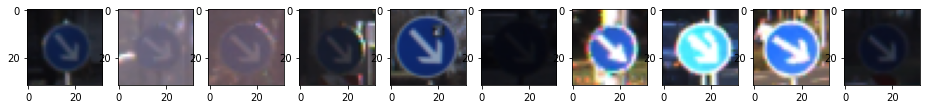

Class 39: Keep left, Training Sample Count: 270


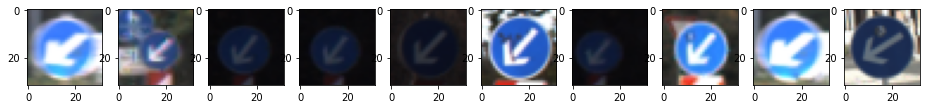

Class 40: Roundabout mandatory, Training Sample Count: 300


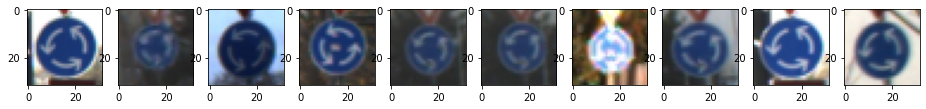

Class 41: End of no passing, Training Sample Count: 210


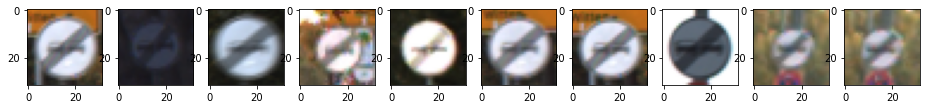

Class 42: End of no passing by vehicles over 3.5 metric tons, Training Sample Count: 210


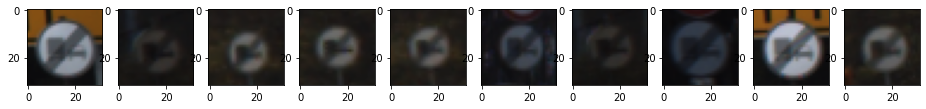

In [6]:
showImageCount = 10

x_display, y_display = shuffle(train['features'], train['labels'])
for sign_index in range(n_classes):
    x_train_single = x_display[y_display == sign_index]
    
    print('Class {}: {}, Training Sample Count: {}'.format(sign_index, sign_names[sign_index], x_train_single.shape[0]))
    fig = plt.figure(figsize=(16, 160))
    for index in range(showImageCount):
        fig.add_subplot(1, 10, index + 1)
        plt.imshow(x_train_single[index])
    plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

### 1. Image Data Preprocssing

#### 1. Balancing data, converting to grayscale and normalization

The precessing is dividied into 3 step. Details are described in the following sections.
1. Balancing data
2. Converting to grayscale
3. Pre-processing for each image (stage 2)

#### 1. Balancing data
The training set is not well balanced for different classes. Therefore, duplicate the training samples for each class randomly so all classes have the same numbers of samples. Different sets of duplicates are computed for each epoch of the training. After the copying, many classes would have the same sample. To overcome this problem, we would perform image augmentation for each set.

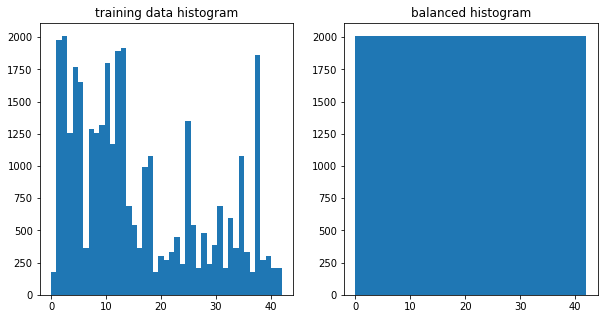

In [46]:
def balanceAndShuffleData(x_train, y_train, n_classes):
    trainHistogram = np.histogram(y_train, bins=n_classes)
    left = max(trainHistogram[0]) - trainHistogram[0]
    x_train, y_train = shuffle(x_train, y_train)
    for i in range(n_classes):
        remain = left[i]
        single_x_train = x_train[y_train == i]
        single_y_train = y_train[y_train == i]
        while remain > 0:
            start_index = 0
            end_index = len(single_y_train)
            if remain < len(single_y_train):
                end_index = remain
            x_train = np.vstack((x_train, single_x_train[start_index:end_index]))
            y_train = np.hstack((y_train, single_y_train[start_index:end_index]))
            remain = remain - len(single_y_train)
    x_train, y_train = shuffle(x_train, y_train)
    return x_train, y_train

[x_balanced_train, y_balanced_train] = balanceAndShuffleData(x_train, y_train, n_classes)

fig = plt.figure(figsize=(10,5))

fig.add_subplot(1, 2, 1)
plt.hist(y_train, bins=n_classes)
plt.title("training data histogram")

fig.add_subplot(1, 2, 2)
plt.hist(y_balanced_train, bins=n_classes) 
plt.title("balanced histogram") 
plt.show()

### 2. Converting to grayscale
Convert to grayscale and make the data between 0 and 1. They are used for initial data.

In [47]:
# Convert to grayscale and make the data between 0 and 1
def convert_to_grayscale(x):
    x = x / 255.0
    x = 0.2126 * x[:,:,:,0] + 0.7152 * x[:,:,:,1] + 0.0722 * x[:,:,:,2]
    x = x[:,:,:, np.newaxis]
    return x

### 3. Normalization
Normalize the result so that the 0 is mapped to the minimum value and 255 is mapped to the maximum value for each image. They are used right before the training or evaluation.

In [9]:
# Normalize the result so that the 0 is mapped to 
# the minimum value and 255 is mapped to the maximum value for each image
def normalize(x):
    shape = x.shape
    for imageIndex in range(shape[0]):
        min_value = np.min(x[imageIndex])
        max_value = np.max(x[imageIndex])
        x[imageIndex] = (x[imageIndex] - min_value) / (max_value - min_value)
    return x

Original


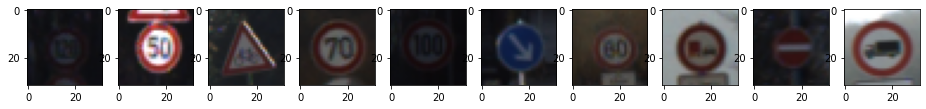

Grayscale (Stage 1)


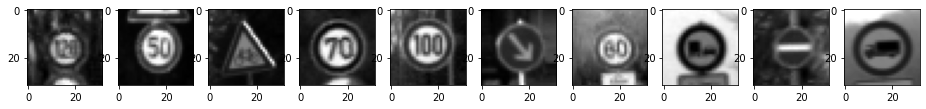

Normalized (Stage 2)


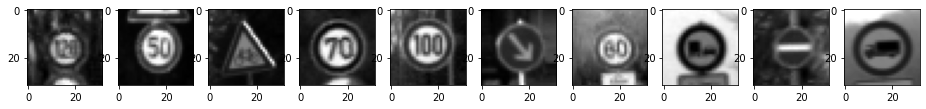

In [10]:
showImageCount = 10

x_grayscale_display = convert_to_grayscale(x_display)
x_normalized_display = normalize(x_grayscale_display)
print('Original')
fig = plt.figure(figsize=(16, 160))
for index in range(showImageCount):
    fig.add_subplot(1, 10, index + 1)
    plt.imshow(x_display[index])
plt.show()
print('Grayscale (Stage 1)')
fig = plt.figure(figsize=(16, 160))
for index in range(showImageCount):
    fig.add_subplot(1, 10, index + 1)
    plt.imshow(x_grayscale_display[index,:,:,0], cmap='gray')
plt.show()
print('Normalized (Stage 2)')
fig = plt.figure(figsize=(16, 160))
for index in range(showImageCount):
    fig.add_subplot(1, 10, index + 1)
    plt.imshow(x_normalized_display[index,:,:,0], cmap='gray')
plt.show()

#### 2. Image augmentation
Image Augmentation using different ways:

1. Random lighting by adjusting gamma
2. Random Rotation
3. Random Scale
4. Random Translation

Image Augmentation would be performed after balancing the data. They would be performed for each epoch of the training.

### 1. Random lighting by adjusting gamma

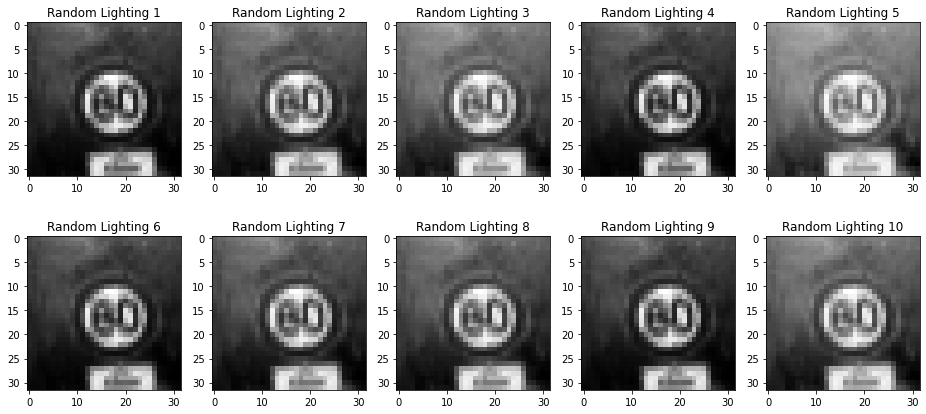

In [11]:
#Image augmentation using random lighting by apply random gamma
def AugmentingImageUsingGamma(image_batch, min_gamma, max_gamma):
    batch_size = image_batch.shape[0]
    for i in range(batch_size):
        
        image = image_batch[i,:,:,:].copy()
        
        gamma = random.random() * (max_gamma - min_gamma) + min_gamma
        image[:,:,:] = ((image[:,:,:]) ** gamma)
        
        image_batch[i,:,:,:] = image
        
    return image_batch

showImageCount = 10
index = 0
pltColCount = 5
loopPerRow = 5
target = 5
x_augmentation = x_grayscale_display[y_display == target]
x_augmentation = x_augmentation[0:1]
x_augmentation = np.tile(x_augmentation,(showImageCount,1,1,1))
x_augmentation = AugmentingImageUsingGamma(x_augmentation, 0.5, 2)
fig = plt.figure(figsize=(16, 18 * showImageCount / loopPerRow / pltColCount))
for i in range(0, showImageCount):
    fig.add_subplot(showImageCount // loopPerRow, pltColCount, i * pltColCount // loopPerRow + 1)
    plt.imshow(x_augmentation[i,:,:,0], cmap='gray')
    plt.title('Random Lighting {}'.format(i + 1))
plt.show()

### 2. Random Rotation

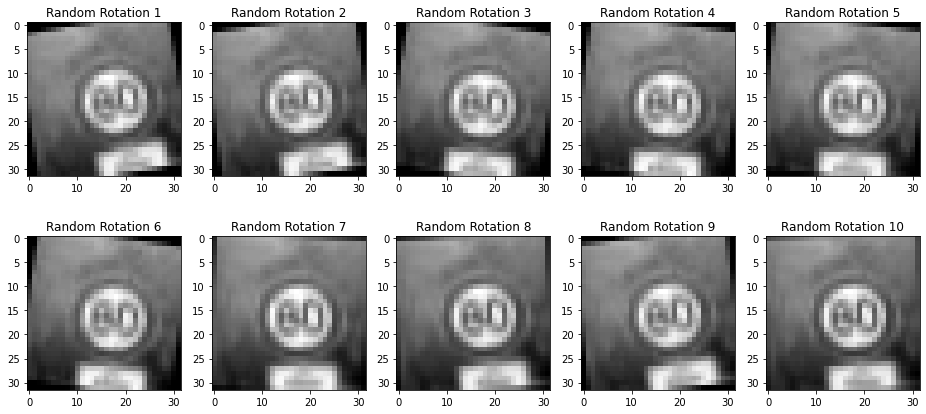

In [12]:
#Image augmentation using rotation
def AugmentingImageUsingRotation(image_batch, max_angle):
    batch_size = image_batch.shape[0]
    for i in range(batch_size):
        
        angle = random.random() * (2 * max_angle) - max_angle
        image = image_batch[i,:,:,:].copy()
        
        image = rotate(image, angle)
        
        image_batch[i,:,:,:] = image
        
    return image_batch

showImageCount = 10
index = 0
pltColCount = 5
loopPerRow = 5
target = 5
x_augmentation = x_grayscale_display[y_display == target]
x_augmentation = x_augmentation[0:1]
x_augmentation = np.tile(x_augmentation,(showImageCount,1,1,1))
x_augmentation = AugmentingImageUsingRotation(x_augmentation, 10)
fig = plt.figure(figsize=(16, 18 * showImageCount / loopPerRow / pltColCount))
for i in range(0, showImageCount):
    fig.add_subplot(showImageCount // loopPerRow, pltColCount, i * pltColCount // loopPerRow + 1)
    plt.imshow(x_augmentation[i,:,:,0], cmap='gray')
    plt.title('Random Rotation {}'.format(i + 1))
plt.show()

### 3. Random Scale

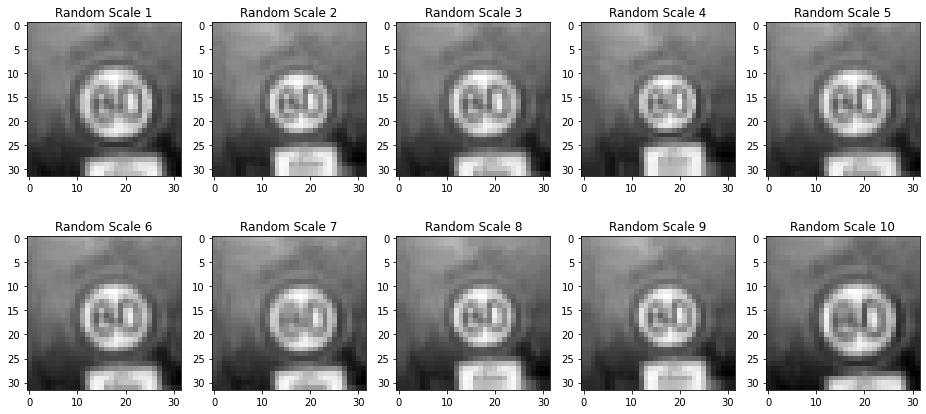

In [13]:
#Image augmentation using scale
def AugmentingImageUsingScale(image_batch, min_scale, max_scale):
    batch_size = image_batch.shape[0]
    for i in range(batch_size):
        
        scale = random.random() * (max_scale - min_scale) + min_scale
        image = image_batch[i,:,:,:].copy()
        
        image_shape = image.shape
        
        if scale >= 1:
            target_image_shape = image_shape
            target_x = int(target_image_shape[0] * scale)
            target_y = int(target_image_shape[1] * scale)
            image = resize(image, (target_x, target_y), anti_aliasing=True)
            x_start = int((target_x - image_shape[0]) / 2)
            y_start = int((target_y - image_shape[1]) / 2)
            image = image[x_start:x_start + target_image_shape[0],x_start:y_start + target_image_shape[0],:]
        else:
            target_image_shape = image_shape
            target_x = int(target_image_shape[0] / scale)
            target_y = int(target_image_shape[1] / scale)
            x_pad = int((target_x - image_shape[0]) / 2)
            y_pad = int((target_y - image_shape[1]) / 2)
            image = np.pad(image, ((x_pad, y_pad), (x_pad, y_pad), (0, 0)), 'edge')
            image = resize(image, (image_shape[0], image_shape[1]), anti_aliasing=True)
        
        
        image_batch[i,:,:,:] = image
        
    return image_batch

showImageCount = 10
index = 0
pltColCount = 5
loopPerRow = 5
target = 5
x_augmentation = x_grayscale_display[y_display == target]
x_augmentation = x_augmentation[0:1]
x_augmentation = np.tile(x_augmentation,(showImageCount,1,1,1))
x_augmentation = AugmentingImageUsingScale(x_augmentation, 0.7, 1.2)
fig = plt.figure(figsize=(16, 18 * showImageCount / loopPerRow / pltColCount))
for i in range(0, showImageCount):
    fig.add_subplot(showImageCount // loopPerRow, pltColCount, i * pltColCount // loopPerRow + 1)
    plt.imshow(x_augmentation[i,:,:,0], cmap='gray')
    plt.title('Random Scale {}'.format(i + 1))
plt.show()

### 4. Random Translation

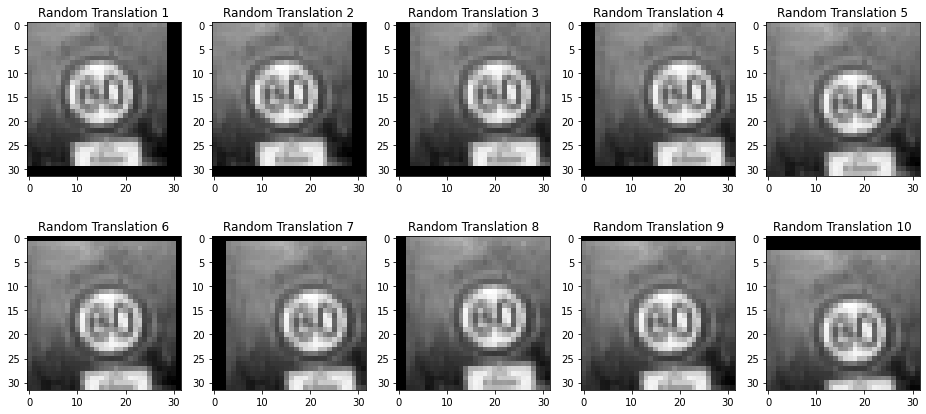

In [14]:
#Image augmentation using translation
def AugmentingImageUsingTranslation(image_batch, max_x_shift, max_y_shift):
    batch_size = image_batch.shape[0]
    for i in range(batch_size):
        x_shift = random.randint(-max_x_shift, max_x_shift)
        y_shift = random.randint(-max_y_shift, max_y_shift)
        
        image = image_batch[i,:,:,:].copy()
        
        if x_shift > 0:
            image[:, x_shift:,:] = image[:, :-x_shift,:]
            image[:,:x_shift,:] = 0
        elif x_shift < 0:
            image[:,:x_shift,:] = image[:, -x_shift:,:]
            image[:, x_shift:,:] = 0
            
        if y_shift > 0:
            image[y_shift:, :,:] = image[:-y_shift, :,:]
            image[:y_shift,:,:] = 0
        elif y_shift < 0:
            image[:y_shift,:,:] = image[-y_shift:, :,:]
            image[y_shift:, :,:] = 0
            
        
        image_batch[i,:,:,:] = image
        
    return image_batch

showImageCount = 10
index = 0
pltColCount = 5
loopPerRow = 5
target = 5
x_augmentation = x_grayscale_display[y_display == target]
x_augmentation = x_augmentation[0:1]
x_augmentation = np.tile(x_augmentation,(showImageCount,1,1,1))
x_augmentation = AugmentingImageUsingTranslation(x_augmentation, 3, 3)
fig = plt.figure(figsize=(16, 18 * showImageCount / loopPerRow / pltColCount))
for i in range(0, showImageCount):
    fig.add_subplot(showImageCount // loopPerRow, pltColCount, i * pltColCount // loopPerRow + 1)
    plt.imshow(x_augmentation[i,:,:,0], cmap='gray')
    plt.title('Random Translation {}'.format(i + 1))
plt.show()

### 5. Combining all methods

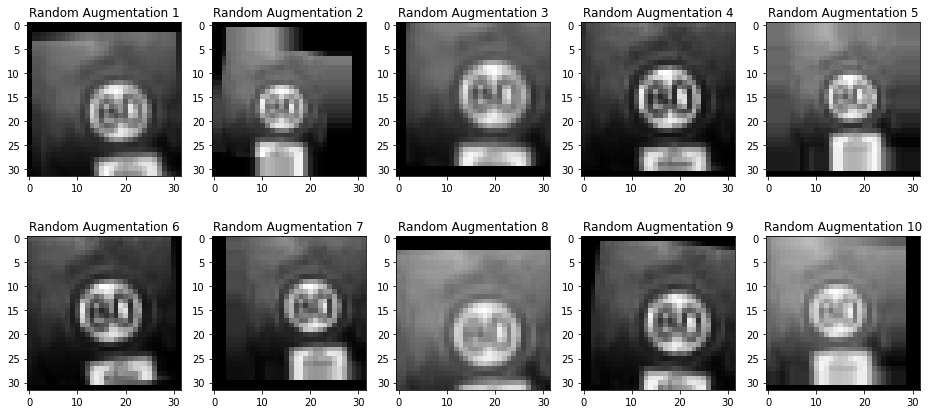

In [15]:
def AugmentingImage(image_batch, min_gamma, max_gamma, rotation, min_scale, max_scale, x_translation, y_translation):
    
    image_batch = AugmentingImageUsingGamma(image_batch, min_gamma, max_gamma)
    image_batch = AugmentingImageUsingRotation(image_batch, rotation)
    image_batch = AugmentingImageUsingScale(image_batch, min_scale, max_scale)
    image_batch = AugmentingImageUsingTranslation(image_batch, x_translation, y_translation)

    return image_batch

showImageCount = 10
index = 0
pltColCount = 5
loopPerRow = 5
target = 5
x_augmentation = x_grayscale_display[y_display == target]
x_augmentation = x_augmentation[0:1]
x_augmentation = np.tile(x_augmentation,(showImageCount,1,1,1))
x_augmentation = AugmentingImage(x_augmentation, 0.5, 2, 10, 0.7, 1.1, 3, 3)
fig = plt.figure(figsize=(16, 18 * showImageCount / loopPerRow / pltColCount))
for i in range(0, showImageCount):
    fig.add_subplot(showImageCount // loopPerRow, pltColCount, i * pltColCount // loopPerRow + 1)
    plt.imshow(x_augmentation[i,:,:,0], cmap='gray')
    plt.title('Random Augmentation {}'.format(i + 1))
plt.show()

### Preprocess all the images using stage 1 first

In [16]:
x_train_grayscale = convert_to_grayscale(x_train)
x_valid_grayscale = convert_to_grayscale(x_valid)
x_test_grayscale = convert_to_grayscale(x_test)

### Model Architecture
My model is defined in the following code.

In [17]:
### Define your architecture here.
# TrafficSignClassifier
# Input: (32, 32, 1)
# Output: (43)
# Parameter: 5377643
def TrafficSignClassifier(x, init_mean, init_sigma, dropout_keep_prob):
    #Input Layer (32 x 32 x 1 Grayscale Image)
    
    # Convolution Layer with 64 3 x 3 kernel without padding and relu activation
    # Input: (32, 32, 1)
    # Output: (30, 30, 64)
    # Parameter: 576
    x = tf.nn.conv2d(x,
                     tf.Variable(tf.truncated_normal((3, 3, 1, 64),
                                                     mean = init_mean, stddev = init_sigma)),
                     [1, 1, 1, 1], 'VALID',
                     name='con2d_1')
    x = tf.nn.bias_add(x,
                       tf.Variable(tf.zeros(64)),
                       name='con2d_1_bias')
    con2d_1_relu = tf.nn.relu(x, name='con2d_1_relu')
    
    # Convolution Layer with 64 3 x 3 kernel without padding and relu activation
    # Input: (30, 30, 64)
    # Output: (28, 28, 64)
    # Parameter: 36864
    x = tf.nn.conv2d(con2d_1_relu,
                     tf.Variable(tf.truncated_normal((3, 3, 64, 64),
                                                     mean = init_mean, stddev = init_sigma)),
                     [1, 1, 1, 1], 'VALID',
                     name='con2d_2')
    x = tf.nn.bias_add(x,
                       tf.Variable(tf.zeros(64)),
                       name='con2d_2_bias')
    con2d_2_relu = tf.nn.relu(x, name='con2d_2_relu')
    
    # Max Pooling Layer with 2 x 2 stride
    # Input: (28, 28, 64)
    # Output: (14, 14, 64)
    # Parameter: 0
    x = tf.nn.max_pool(con2d_2_relu,
                       [1, 2, 2, 1],
                       [1, 2, 2, 1],
                       'SAME',
                       name='max_pool_1')
    
    # Convolution Layer with 128 3 x 3 kernel without padding and relu activation
    # Input: (14, 14, 64)
    # Output: (12, 12, 128)
    # Parameter: 73728
    x = tf.nn.conv2d(x,
                     tf.Variable(tf.truncated_normal((3, 3, 64, 128),
                                                     mean = init_mean, stddev = init_sigma)),
                     [1, 1, 1, 1], 'VALID',
                     name='con2d_2')
    x = tf.nn.bias_add(x,
                       tf.Variable(tf.zeros(128)),
                       name='con2d_2_bias')
    con2d_3_relu = tf.nn.relu(x, name='con2d_3_relu')
    
    # Max Pooling Layer with 2 x 2 stride
    # Input: (12, 12, 128)
    # Output: (6, 6, 128)
    # Parameter: 0
    x = tf.nn.max_pool(con2d_3_relu,
                      [1, 2, 2, 1],
                      [1, 2, 2, 1],
                      'SAME',
                       name='max_pool_2')
    
    # Flatten Layer
    # Input: (6, 6, 128)
    # Output: 4608
    # Parameter: 0
    x = flatten(x)
    
    # Dense Layer with relu activation
    # Input: 4608
    # Output: 1024
    # Parameter: 4719616
    x = tf.matmul(x,
                  tf.Variable(tf.truncated_normal((4608, 1024),
                                                  mean = init_mean, stddev = init_sigma)),
                  name='dense_1_matmul')
    x = tf.nn.bias_add(x,
                       tf.Variable(tf.zeros(1024)),
                       name='dense_1_bias')
    x = tf.nn.relu(x, name='dense_1_relu')
    
    # Dropout Layer
    x = tf.nn.dropout(x, keep_prob=dropout_keep_prob,
                     name='dense_1_dropout')
    
    # Dense Layer with relu activation
    # Output: 1024
    # Output: 512
    # Parameter: 524800
    x = tf.matmul(x,
                  tf.Variable(tf.truncated_normal((1024, 512),
                                                  mean = init_mean, stddev = init_sigma)),
                  name='dense_2_matmul')
    x = tf.nn.bias_add(x,
                       tf.Variable(tf.zeros(512)),
                       name='dense_2_bias')
    x = tf.nn.relu(x, name='dense_2_relu')
    
    # Dropout Layer
    x = tf.nn.dropout(x, keep_prob=dropout_keep_prob,
                     name='dense_2_dropout')
    
    
    # Dense Layer with relu activation
    # Output: 512
    # Output: 43
    # Parameter: 22059
    x = tf.matmul(x,
                  tf.Variable(tf.truncated_normal((512, 43),
                                                  mean = init_mean, stddev = init_sigma)),
                  name='dense_3_matmul')
    x = tf.nn.bias_add(x,
                       tf.Variable(tf.zeros(43)),
                       name='dense_3_bias')
    
    return x, con2d_1_relu, con2d_2_relu, con2d_3_relu
    

In [18]:
x_holder = tf.placeholder(tf.float32, (None, 32, 32, 1))
y_holder = tf.placeholder(tf.int32, (None))
adam_learn_rate_holder = tf.placeholder(tf.float32, ())
dropout_keep_prob_holder = tf.placeholder_with_default(1.0, shape=())
one_hot_y = tf.one_hot(y_holder, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [19]:
init_mean = 0
init_sigma = 0.1

logits, con2d_1_relu, con2d_2_relu, con2d_3_relu = TrafficSignClassifier(x_holder, init_mean, init_sigma, dropout_keep_prob_holder)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = adam_learn_rate_holder)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
prediction = tf.argmax(logits, 1)
softmax = tf.nn.softmax(logits, 1)

Instructions for updating:
Use keras.layers.Flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [20]:
def compute(X_data, batch_size):
    num_examples = len(X_data)
    X_data = normalize(X_data)
    totalResult = np.array([])
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x = X_data[offset:offset + batch_size]
        result = sess.run(prediction, feed_dict={x_holder: batch_x})
        totalResult = np.concatenate((totalResult, result))
    return totalResult

def evaluate(X_data, y_data, batch_size):
    num_examples = len(X_data)
    X_data = normalize(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x, batch_y = X_data[offset:offset + batch_size], y_data[offset:offset + batch_size]
        accuracy = sess.run(accuracy_operation, feed_dict={x_holder: batch_x, y_holder: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy * 100 / num_examples

In [21]:
min_gamma = 0.5
max_gamma = 2.0
max_rotation = 10.0
min_scale = 0.6
max_scale = 1.3
max_x_translation = 4
max_y_translation = 4

saver = tf.train.Saver()
def train_traffic_sign_classifier(x_train, y_train, x_valid, y_valid, x_test, y_test,
          epoch, learn_rate, batch_size, dropout_keep_prob, output_file):
    org_train_hist = []
    train_hist = []
    valid_hist = []
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        [x_temp, y_temp] = balanceAndShuffleData(x_train, y_train, n_classes)
        org_train_acc = evaluate(x_train, y_train, batch_size)
        train_acc = evaluate(x_temp, y_temp, batch_size)
        valid_acc = evaluate(x_valid, y_valid, batch_size)
        train_hist.append(train_acc)
        valid_hist.append(valid_acc)
        num_examples = len(x_temp)
        print('case: {}'.format(num_examples))
        print('Epoch: {} / {} Training (Org) Accuracy: {:.3f} % Training Accuracy: {:.3f} % Validation Accuracy = {:.3f} %'.format(0, epoch, org_train_acc, train_acc, valid_acc))

        for i in range(epoch):
            [x_temp, y_temp] = balanceAndShuffleData(x_train, y_train, n_classes)
            x_temp = AugmentingImage(x_temp,
                                     min_gamma, max_gamma,
                                     max_rotation,
                                     min_scale, max_scale,
                                     max_x_translation, max_y_translation)
            for offset in range(0, num_examples, batch_size):
                end = offset + batch_size
                batch_x, batch_y = x_temp[offset:end], y_temp[offset:end]
                sess.run(training_operation, feed_dict={x_holder: batch_x,
                                                        y_holder: batch_y,
                                                        adam_learn_rate_holder: learn_rate,
                                                        dropout_keep_prob_holder: dropout_keep_prob})
            org_train_acc = evaluate(x_train, y_train, batch_size)
            train_acc = evaluate(x_temp, y_temp, batch_size)
            valid_acc = evaluate(x_valid, y_valid, batch_size)

            org_train_hist.append(org_train_acc)
            train_hist.append(train_acc)
            valid_hist.append(valid_acc)
            print('Epoch: {} / {} Training (Org) Accuracy: {:.3f} % Training Accuracy: {:.3f} % Validation Accuracy = {:.3f} %'.format(i + 1, epoch, org_train_acc, train_acc, valid_acc))

        saver.save(sess, output_file)

        test_acc = evaluate(x_test, y_test, batch_size)
        print('Test Accuracy = {:.3f} %'.format(test_acc))

        y_train_result = compute(x_train, batch_size)
        y_valid_result = compute(x_valid, batch_size)
        y_test_result = compute(x_test, batch_size)
        print('Model saved')
    return y_train_result, y_valid_result, y_test_result, test_acc, org_train_hist, train_hist, valid_hist



Traing the model.

In [22]:
epoch = 15
learn_rate = 0.001
batch_size = 512
dropout_keep_prob = 0.8
output_file = './trafficSignClassifier'

y_train_result1, y_valid_result1, y_test_result1, test_acc1, org_train_hist1, train_hist1, valid_hist1 = train_traffic_sign_classifier(
    x_train_grayscale, y_train, x_valid_grayscale, y_valid, x_test_grayscale, y_test,
    epoch, learn_rate, batch_size, dropout_keep_prob, output_file)

case: 86430
Epoch: 0 / 15 Training (Org) Accuracy: 2.971 % Training Accuracy: 2.555 % Validation Accuracy = 3.492 %
Epoch: 1 / 15 Training (Org) Accuracy: 85.275 % Training Accuracy: 78.562 % Validation Accuracy = 80.068 %
Epoch: 2 / 15 Training (Org) Accuracy: 95.635 % Training Accuracy: 93.528 % Validation Accuracy = 91.202 %
Epoch: 3 / 15 Training (Org) Accuracy: 98.330 % Training Accuracy: 96.844 % Validation Accuracy = 95.374 %
Epoch: 4 / 15 Training (Org) Accuracy: 98.876 % Training Accuracy: 98.527 % Validation Accuracy = 97.415 %
Epoch: 5 / 15 Training (Org) Accuracy: 99.063 % Training Accuracy: 98.819 % Validation Accuracy = 97.506 %
Epoch: 6 / 15 Training (Org) Accuracy: 99.486 % Training Accuracy: 99.199 % Validation Accuracy = 98.231 %
Epoch: 7 / 15 Training (Org) Accuracy: 99.417 % Training Accuracy: 99.309 % Validation Accuracy = 97.755 %
Epoch: 8 / 15 Training (Org) Accuracy: 99.204 % Training Accuracy: 99.471 % Validation Accuracy = 97.528 %
Epoch: 9 / 15 Training (Org)

Plot the results.

Training Accuracy   99.759 %
Validation Accuracy 98.413 %
Test Accuracy       97.348 %


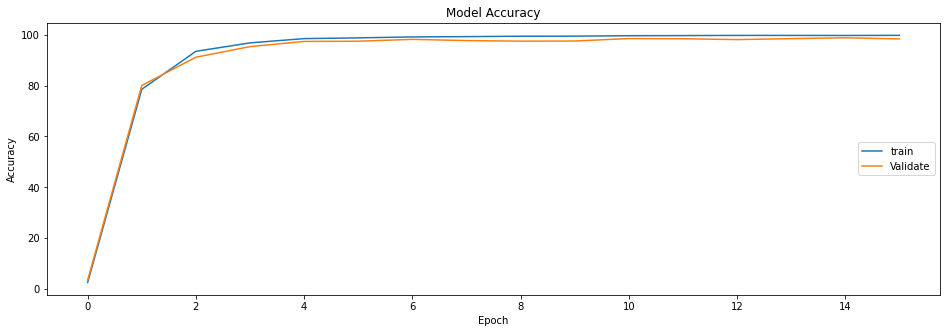

In [23]:
print('Training Accuracy   {:.3f} %'.format(org_train_hist1[len(org_train_hist1)-1]))
print('Validation Accuracy {:.3f} %'.format(valid_hist1[len(valid_hist1)-1]))
print('Test Accuracy       {:.3f} %'.format(test_acc1))

fig = plt.figure(figsize=(16, 5))
plt.plot(train_hist1)
plt.plot(valid_hist1)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'Validate'], loc='right')
plt.show()

### Analyze performance in more detail
Calculate the precision and recall for each traffic sign type from the test set.
Display some of the wrong prediction images.

In [67]:
def computeRecallAndPrecision(x, y, y_result, n_classes):
    recall = np.zeros((n_classes))
    precision = np.zeros((n_classes))
    
    ones = np.ones_like((y))
    corr = np.zeros_like((y))
    wrong = np.zeros_like((y))
    corr[y_result == y] = 1
    wrong[y_result != y] = 1
    accuracy = (y.shape[0] - np.sum(wrong)) / y.shape[0]
    for sign_index in range(n_classes):
        true_positive = np.sum(corr[y_result == sign_index])
        false_positive = np.sum(wrong[y_result == sign_index])
        false_negative = np.sum(wrong[y == sign_index])
        
        precision[sign_index] = true_positive / (true_positive + false_positive)
        recall[sign_index] = true_positive / (true_positive + false_negative)
        
    return accuracy, recall, precision

def printRecallAndPrecision(accuracy, sign_names, recall, precision):
    print('Accuracy: {:.3f} %'.format(accuracy * 100))
    for sign_index in range(len(sign_names)):
        print('(Class {}): {}'.format(sign_index, sign_names[sign_index]))
        print('\t\t\t\t\tRecall: {:.3f} %  \tPrecision: {:.3f} %'.format(recall[sign_index] * 100, precision[sign_index] * 100))

def showWrongResult(x, y, y_result, max_show_count = 20):
    wrong = np.zeros_like(y)
    wrong[y_result != y] = 1
    wrong_count = np.sum(wrong)
    print('Number of wrong predictions: {}'.format(wrong_count))

    if wrong_count > max_show_count:
        wrong_count = max_show_count

    showImageCount = wrong_count
    index = 0
    pltColCount = 4
    loopPerRow = 4
    target = 1
    x_image = x[y_result != y]
    y_ground_truth = y[y_result != y]
    y_prediction = y_result[y_result != y]
    fig = plt.figure(figsize=(16, 20 * showImageCount / loopPerRow / pltColCount))
    for i in range(0, showImageCount):
        temp = 1
        fig.add_subplot(showImageCount // loopPerRow, pltColCount, i * pltColCount // loopPerRow + temp)
        plt.imshow(x_image[i])
        plt.title('Ground truth:\n{}\nPrediction:\n{}'.format(sign_names[y_ground_truth[i]], sign_names[int(y_prediction[i])]))

    plt.show()

### Precision and recall for each traffic sign type from the training set

Accuracy: 99.759 %
(Class 0): Speed limit (20km/h)
					Recall: 100.000 %  	Precision: 100.000 %
(Class 1): Speed limit (30km/h)
					Recall: 99.545 %  	Precision: 99.797 %
(Class 2): Speed limit (50km/h)
					Recall: 99.851 %  	Precision: 97.003 %
(Class 3): Speed limit (60km/h)
					Recall: 99.762 %  	Precision: 99.921 %
(Class 4): Speed limit (70km/h)
					Recall: 99.774 %  	Precision: 99.887 %
(Class 5): Speed limit (80km/h)
					Recall: 96.788 %  	Precision: 99.750 %
(Class 6): End of speed limit (80km/h)
					Recall: 100.000 %  	Precision: 100.000 %
(Class 7): Speed limit (100km/h)
					Recall: 99.457 %  	Precision: 99.922 %
(Class 8): Speed limit (120km/h)
					Recall: 99.762 %  	Precision: 99.683 %
(Class 9): No passing
					Recall: 100.000 %  	Precision: 100.000 %
(Class 10): No passing for vehicles over 3.5 metric tons
					Recall: 100.000 %  	Precision: 99.944 %
(Class 11): Right-of-way at the next intersection
					Recall: 99.915 %  	Precision: 100.000 %
(Class 12): Priorit

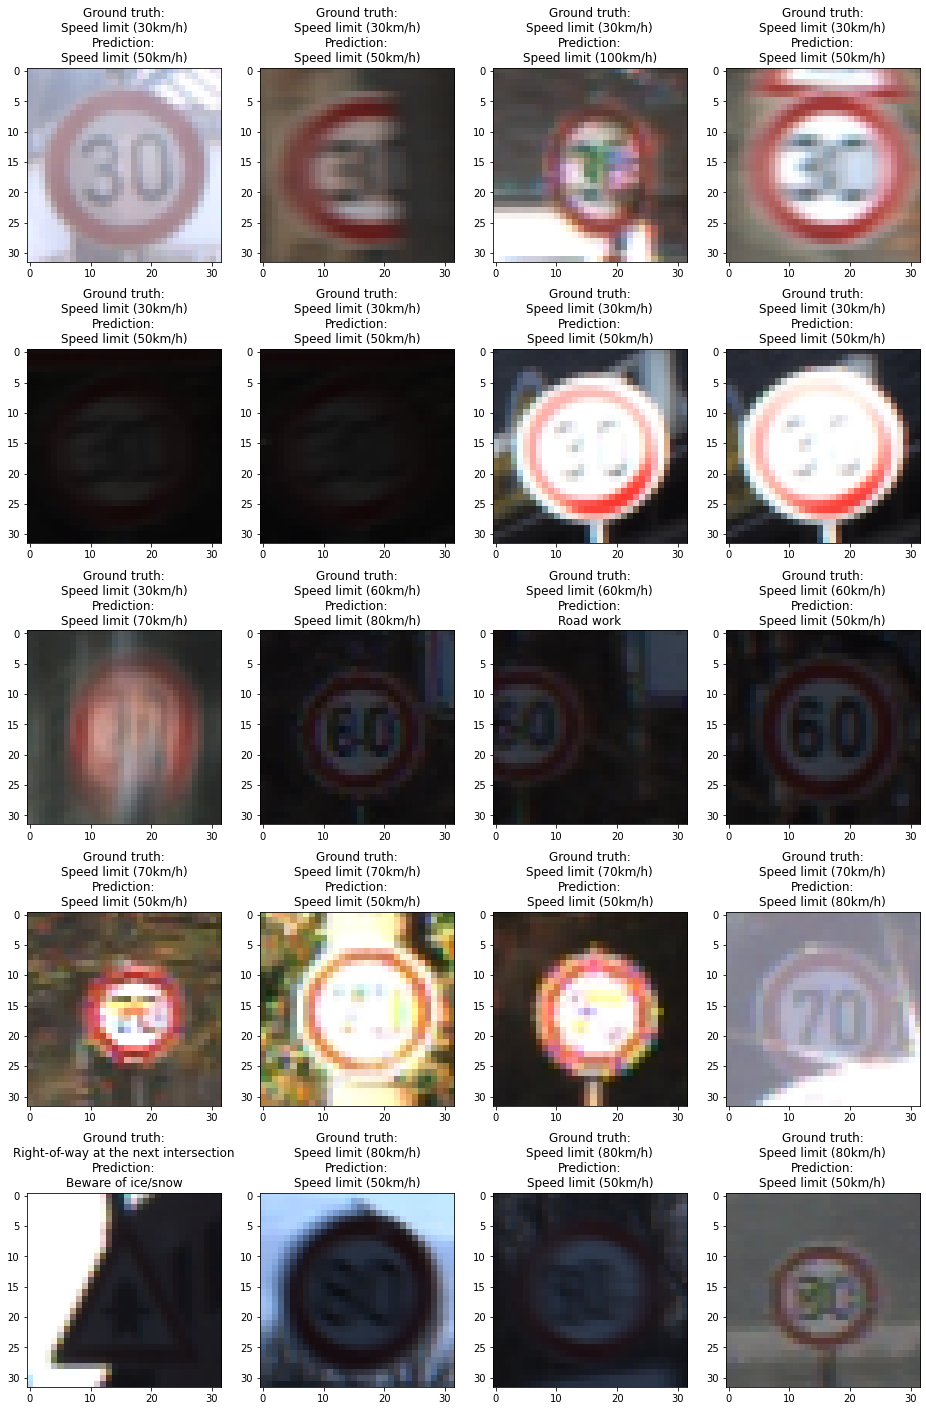

In [68]:
train_accuracy, train_recall, train_precision = computeRecallAndPrecision(x_train, y_train, y_train_result1, n_classes)
printRecallAndPrecision(train_accuracy, sign_names, train_recall, train_precision)
showWrongResult(x_train, y_train, y_train_result1, 20)

### Precision and recall for each traffic sign type from the validation set

Accuracy: 99.759 %
(Class 0): Speed limit (20km/h)
					Recall: 100.000 %  	Precision: 100.000 %
(Class 1): Speed limit (30km/h)
					Recall: 97.083 %  	Precision: 100.000 %
(Class 2): Speed limit (50km/h)
					Recall: 100.000 %  	Precision: 91.954 %
(Class 3): Speed limit (60km/h)
					Recall: 98.000 %  	Precision: 100.000 %
(Class 4): Speed limit (70km/h)
					Recall: 100.000 %  	Precision: 100.000 %
(Class 5): Speed limit (80km/h)
					Recall: 95.238 %  	Precision: 99.502 %
(Class 6): End of speed limit (80km/h)
					Recall: 100.000 %  	Precision: 100.000 %
(Class 7): Speed limit (100km/h)
					Recall: 100.000 %  	Precision: 100.000 %
(Class 8): Speed limit (120km/h)
					Recall: 98.667 %  	Precision: 99.329 %
(Class 9): No passing
					Recall: 100.000 %  	Precision: 99.338 %
(Class 10): No passing for vehicles over 3.5 metric tons
					Recall: 100.000 %  	Precision: 99.526 %
(Class 11): Right-of-way at the next intersection
					Recall: 100.000 %  	Precision: 99.338 %
(Class 12): P

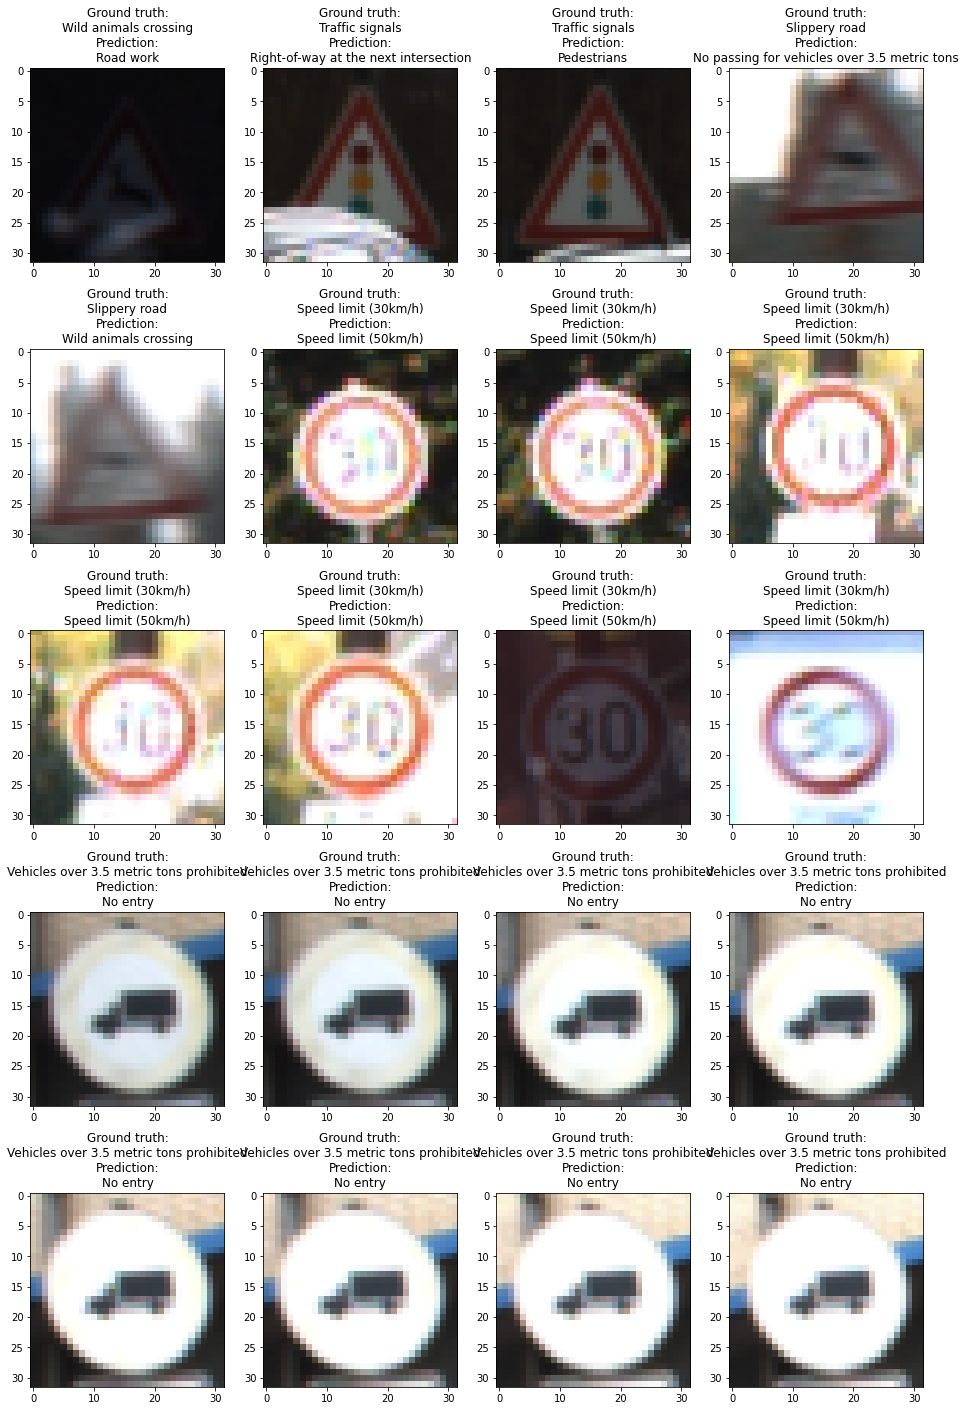

In [69]:
valid_accuracy, valid_recall, valid_precision = computeRecallAndPrecision(x_valid, y_valid, y_valid_result1, n_classes)
printRecallAndPrecision(train_accuracy, sign_names, valid_recall, valid_precision)
showWrongResult(x_valid, y_valid, y_valid_result1, 20)

### Precision and recall for each traffic sign type from the test set

Accuracy: 99.759 %
(Class 0): Speed limit (20km/h)
					Recall: 100.000 %  	Precision: 100.000 %
(Class 1): Speed limit (30km/h)
					Recall: 98.194 %  	Precision: 99.158 %
(Class 2): Speed limit (50km/h)
					Recall: 99.733 %  	Precision: 92.804 %
(Class 3): Speed limit (60km/h)
					Recall: 96.667 %  	Precision: 97.098 %
(Class 4): Speed limit (70km/h)
					Recall: 98.030 %  	Precision: 99.538 %
(Class 5): Speed limit (80km/h)
					Recall: 94.444 %  	Precision: 97.222 %
(Class 6): End of speed limit (80km/h)
					Recall: 95.333 %  	Precision: 97.945 %
(Class 7): Speed limit (100km/h)
					Recall: 97.556 %  	Precision: 99.546 %
(Class 8): Speed limit (120km/h)
					Recall: 96.667 %  	Precision: 98.416 %
(Class 9): No passing
					Recall: 95.000 %  	Precision: 99.781 %
(Class 10): No passing for vehicles over 3.5 metric tons
					Recall: 99.697 %  	Precision: 97.481 %
(Class 11): Right-of-way at the next intersection
					Recall: 93.571 %  	Precision: 99.746 %
(Class 12): Priority road

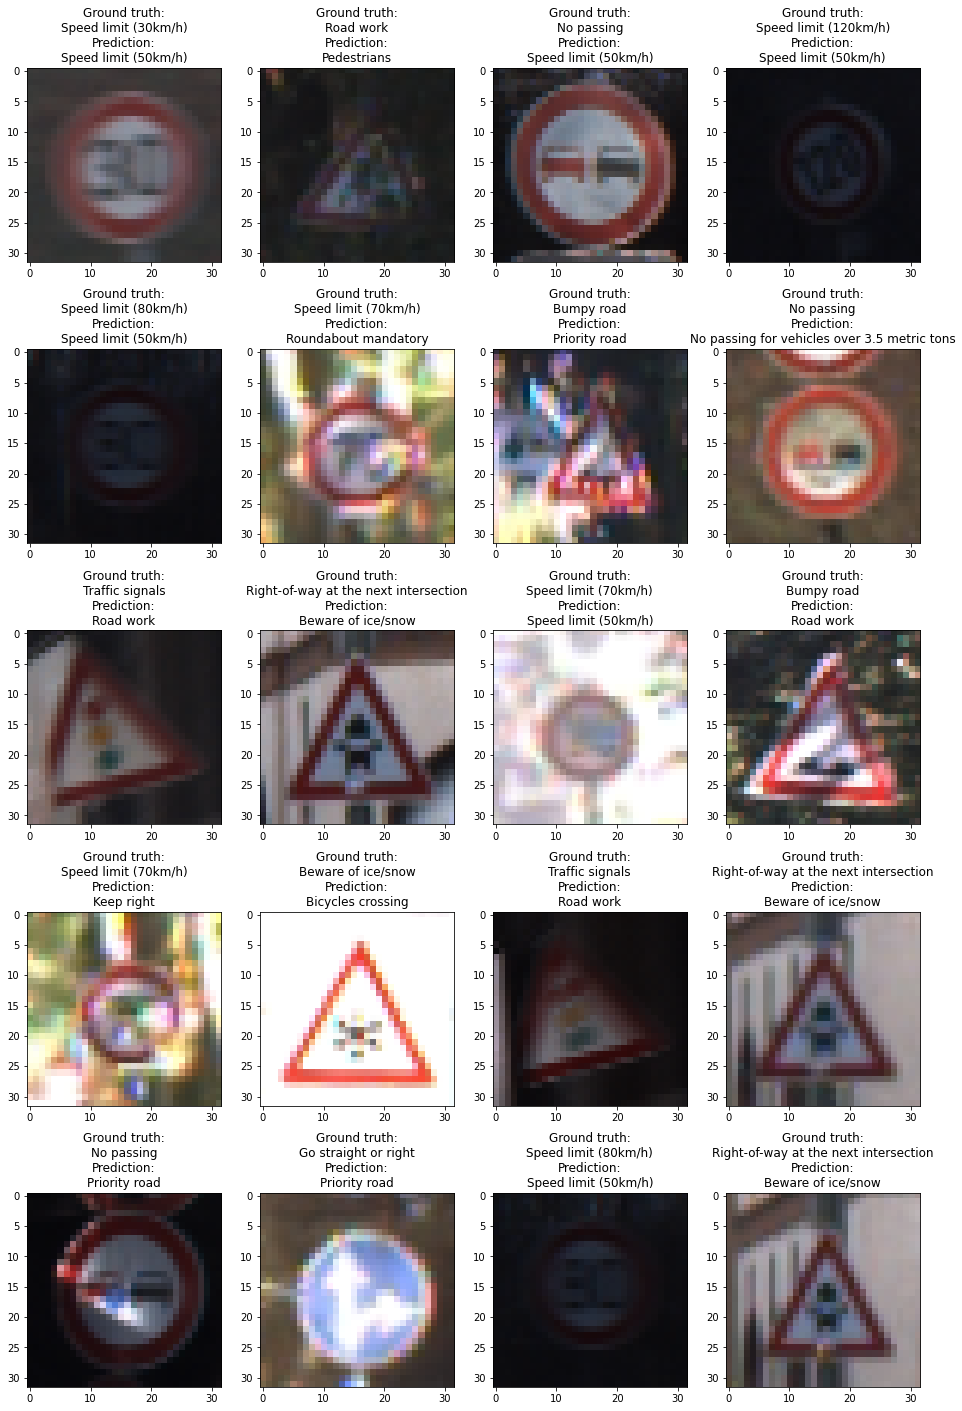

In [70]:
test_accuracy, test_recall, test_precision = computeRecallAndPrecision(x_test, y_test, y_test_result1, n_classes)
printRecallAndPrecision(train_accuracy, sign_names, test_recall, test_precision)
showWrongResult(x_test, y_test, y_test_result1, 20)

---
## Step 3: Test the Model on New Images

Test the model on 10 pictures of German traffic signs either found from the web or taken by myself.

### Load and Output the Images
Load the images from the folder `external_image` and display them.

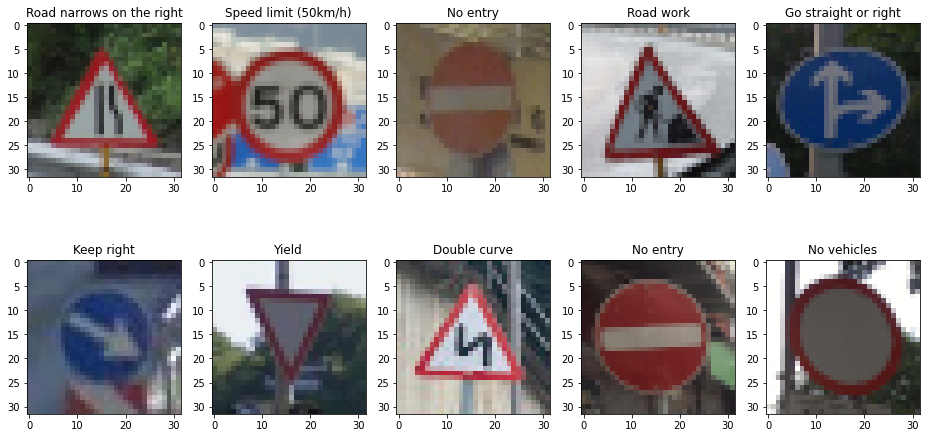

In [28]:
input_dir = 'external_image'
image_list = os.listdir(input_dir)
x_external_test = np.zeros((len(image_list), 32, 32, 3), dtype=int)
y_external_test = np.array([24, 2, 17, 25, 36, 38, 13, 21, 17, 15])

fig = plt.figure(figsize=(16, 8))
for index, file_name in enumerate(image_list):
    image = mpimg.imread(os.path.join(input_dir, file_name))
    x_external_test[index] = image

    fig.add_subplot(2, 5, index + 1)
    plt.title(sign_names[int(y_external_test[index])])
    plt.imshow(x_external_test[index])
plt.show()


### Predict the Sign Type for Each Image
Predict the new 10 images. Each prediction is shown on the title of the image.

INFO:tensorflow:Restoring parameters from ./trafficSignClassifier


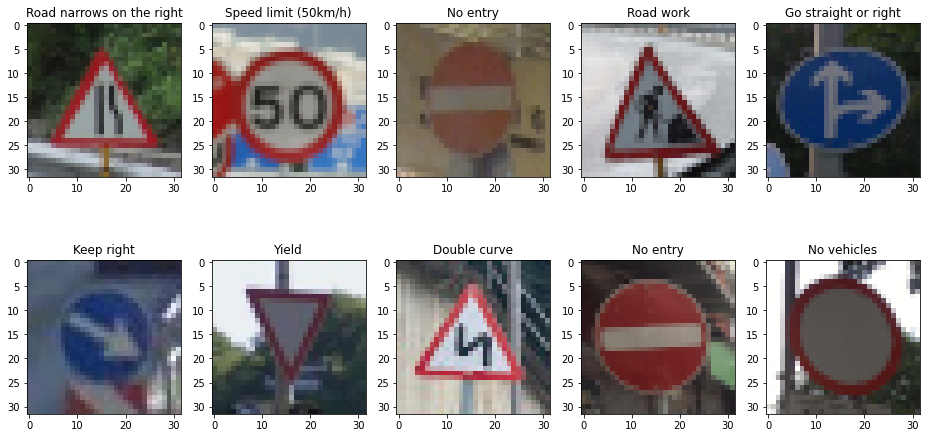

In [29]:
def classify_using_traffic_sign_classifier(x_data, batch_size, input_file):
    with tf.Session() as sess:
        saver.restore(sess, input_file)

        y_result = compute(x_data, batch_size)
    return y_result

x_grayscale_external_test = convert_to_grayscale(x_external_test)

y_external_predict = classify_using_traffic_sign_classifier(x_grayscale_external_test, 10, './trafficSignClassifier')

fig = plt.figure(figsize=(16, 8))
for index, file_name in enumerate(image_list):

    fig.add_subplot(2, 5, index + 1)
    plt.imshow(x_external_test[index])
    plt.title(sign_names[int(y_external_predict[index])])
plt.show()

### Analyze Performance
Compute the accuracy of the new 10 images.

In [30]:
y_external_correct = np.zeros_like(y_external_test)
y_external_correct[y_external_test == y_external_predict] = 1
print('Accuracy: {:.3f} %'.format(np.sum(y_external_correct) / y_external_correct.shape[0] * 100))

Accuracy: 100.000 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web
For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image) and plot the corresponding bar charts.

INFO:tensorflow:Restoring parameters from ./trafficSignClassifier
----------------------------------------------------------------------------------------------------
Top 5 Probablities for 01.jpg

Road narrows on the right (Class 24)
					96.552 %
General caution (Class 18)
					3.448 %
Pedestrians (Class 27)
					0.000 %
Double curve (Class 21)
					0.000 %
Children crossing (Class 28)
					0.000 %


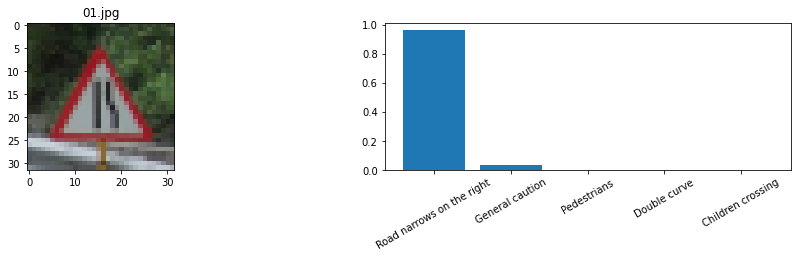

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 02.jpg

Speed limit (50km/h) (Class 2)
					99.992 %
Speed limit (60km/h) (Class 3)
					0.008 %
Speed limit (30km/h) (Class 1)
					0.000 %
Speed limit (80km/h) (Class 5)
					0.000 %
No passing for vehicles over 3.5 metric tons (Class 10)
					0.000 %


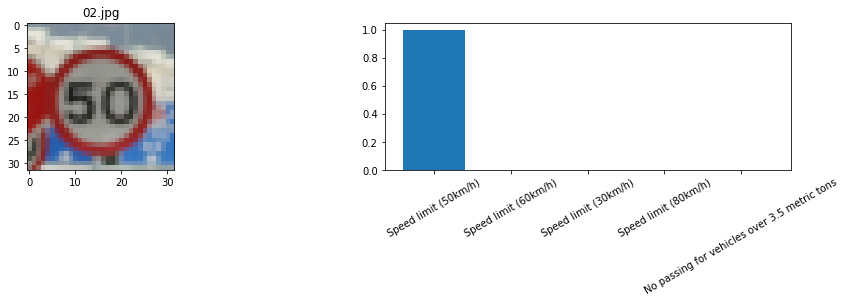

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 03.jpg

No entry (Class 17)
					99.912 %
Stop (Class 14)
					0.085 %
Keep right (Class 38)
					0.002 %
Priority road (Class 12)
					0.000 %
No passing (Class 9)
					0.000 %


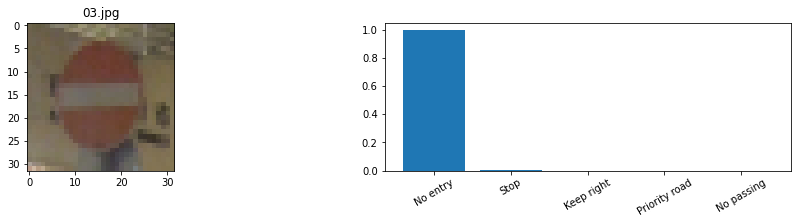

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 04.jpg

Road work (Class 25)
					99.620 %
Children crossing (Class 28)
					0.379 %
Bicycles crossing (Class 29)
					0.001 %
Beware of ice/snow (Class 30)
					0.000 %
Road narrows on the right (Class 24)
					0.000 %


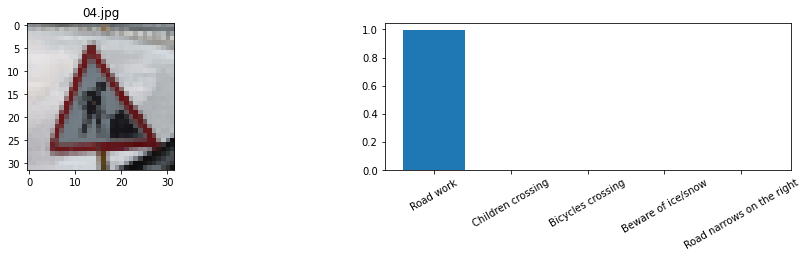

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 05.jpg

Go straight or right (Class 36)
					99.992 %
Ahead only (Class 35)
					0.006 %
Turn right ahead (Class 33)
					0.002 %
No passing for vehicles over 3.5 metric tons (Class 10)
					0.000 %
Stop (Class 14)
					0.000 %


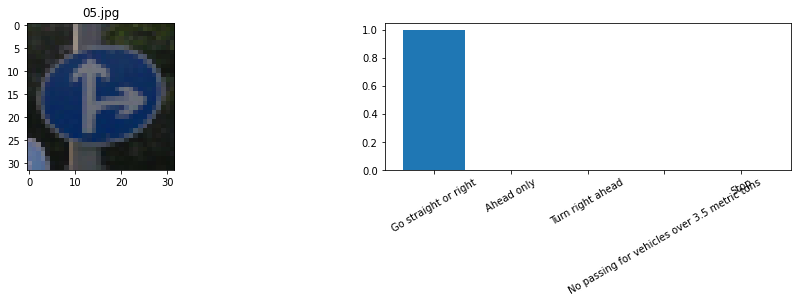

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 06.jpg

Keep right (Class 38)
					100.000 %
No passing for vehicles over 3.5 metric tons (Class 10)
					0.000 %
Turn left ahead (Class 34)
					0.000 %
Priority road (Class 12)
					0.000 %
Stop (Class 14)
					0.000 %


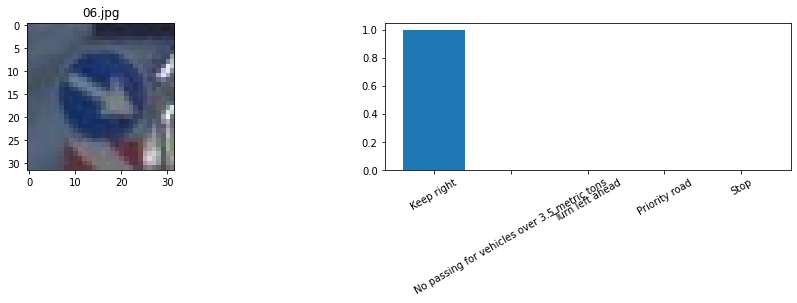

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 07.jpg

Yield (Class 13)
					100.000 %
Priority road (Class 12)
					0.000 %
Stop (Class 14)
					0.000 %
Speed limit (30km/h) (Class 1)
					0.000 %
No vehicles (Class 15)
					0.000 %


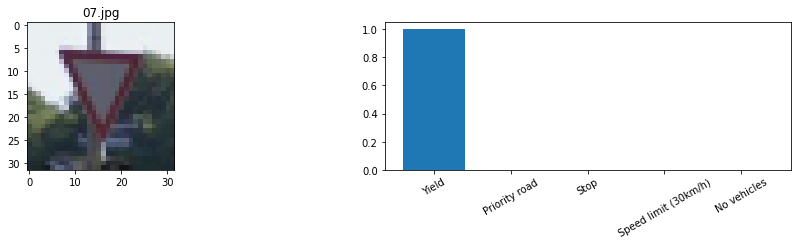

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 08.jpg

Double curve (Class 21)
					82.911 %
Children crossing (Class 28)
					16.958 %
Beware of ice/snow (Class 30)
					0.116 %
Right-of-way at the next intersection (Class 11)
					0.013 %
Wild animals crossing (Class 31)
					0.001 %


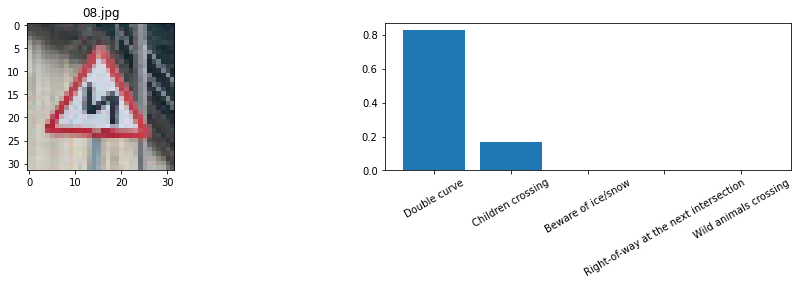

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 09.jpg

No entry (Class 17)
					99.957 %
Stop (Class 14)
					0.043 %
Turn right ahead (Class 33)
					0.000 %
Roundabout mandatory (Class 40)
					0.000 %
Yield (Class 13)
					0.000 %


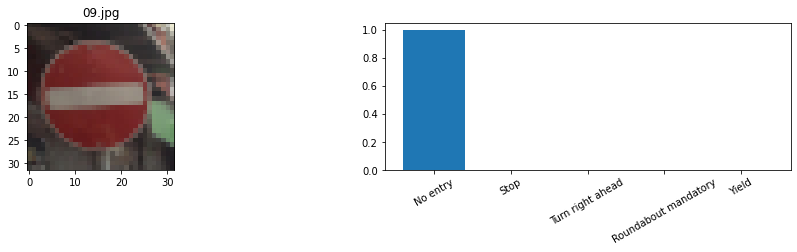

----------------------------------------------------------------------------------------------------
Top 5 Probablities for 10.JPG

No vehicles (Class 15)
					100.000 %
No passing (Class 9)
					0.000 %
Speed limit (70km/h) (Class 4)
					0.000 %
Keep right (Class 38)
					0.000 %
Speed limit (50km/h) (Class 2)
					0.000 %


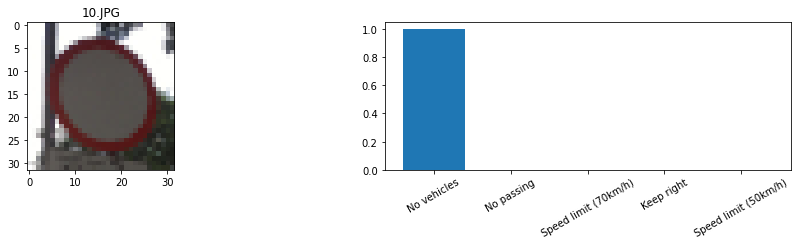

In [66]:
def compute_top_k(X_data, batch_size, top_k):
    num_examples = len(X_data)
    X_data = normalize(X_data)
    sess = tf.get_default_session()
    for offset in range(0, num_examples, batch_size):
        batch_x = X_data[offset:offset + batch_size]
        top_k, indice = sess.run(tf.nn.top_k(softmax, k=top_k), feed_dict={x_holder: batch_x})
        if offset == 0:
            top_k_result = top_k
            indice_result = indice
        else:
            top_k_result = np.vstack((top_k_result, top_k))
            indice_result = np.vstack((indice_result, indice))
    return top_k_result, indice_result

def compute_top_k_using_traffic_sign_classifier(x_data, batch_size, top_k, input_file):
    with tf.Session() as sess:
        saver.restore(sess, input_file)

        top_k_result = compute_top_k(x_data, batch_size, top_k)
    return top_k_result

top_k = 5

top_k_result, indice_result = compute_top_k_using_traffic_sign_classifier(x_grayscale_external_test, 512, top_k, './trafficSignClassifier')

for index, file_name in enumerate(image_list):
    print('-' * 100)
    print('Top {} Probablities for {}'.format(top_k, file_name))
    print()
    for k in range(top_k):
        print('{} (Class {})'.format(sign_names[indice_result[index, k]], indice_result[index, k]))
        print('\t\t\t\t\t{:.3f} %'.format(top_k_result[index,k] * 100))
    fig = plt.figure(figsize=(16, 32))
    fig.add_subplot(10, 2, index * 2 + 1)
    plt.imshow(x_external_test[index])
    plt.title(file_name)
    
    fig.add_subplot(10, 2, index * 2 + 2)
    plt.bar(np.arange(top_k), top_k_result[index])
    plt.xticks(np.arange(top_k), np.array(sign_names)[indice_result[index]], rotation=30)
    plt.show()

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [61]:
# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def output_feature_map(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    sess = tf.get_default_session()
    activation = tf_activation.eval(session=sess,feed_dict={x_holder : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,5 * int(featuremaps/16)))
    for featuremap in range(featuremaps):
        plt.subplot(int(featuremaps/8),8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

In [62]:
def compute_feature_map(image_input, tf_activation, input_file):
    with tf.Session() as sess:
        saver.restore(sess, input_file)

        output_feature_map(image_input, tf_activation)

INFO:tensorflow:Restoring parameters from ./trafficSignClassifier


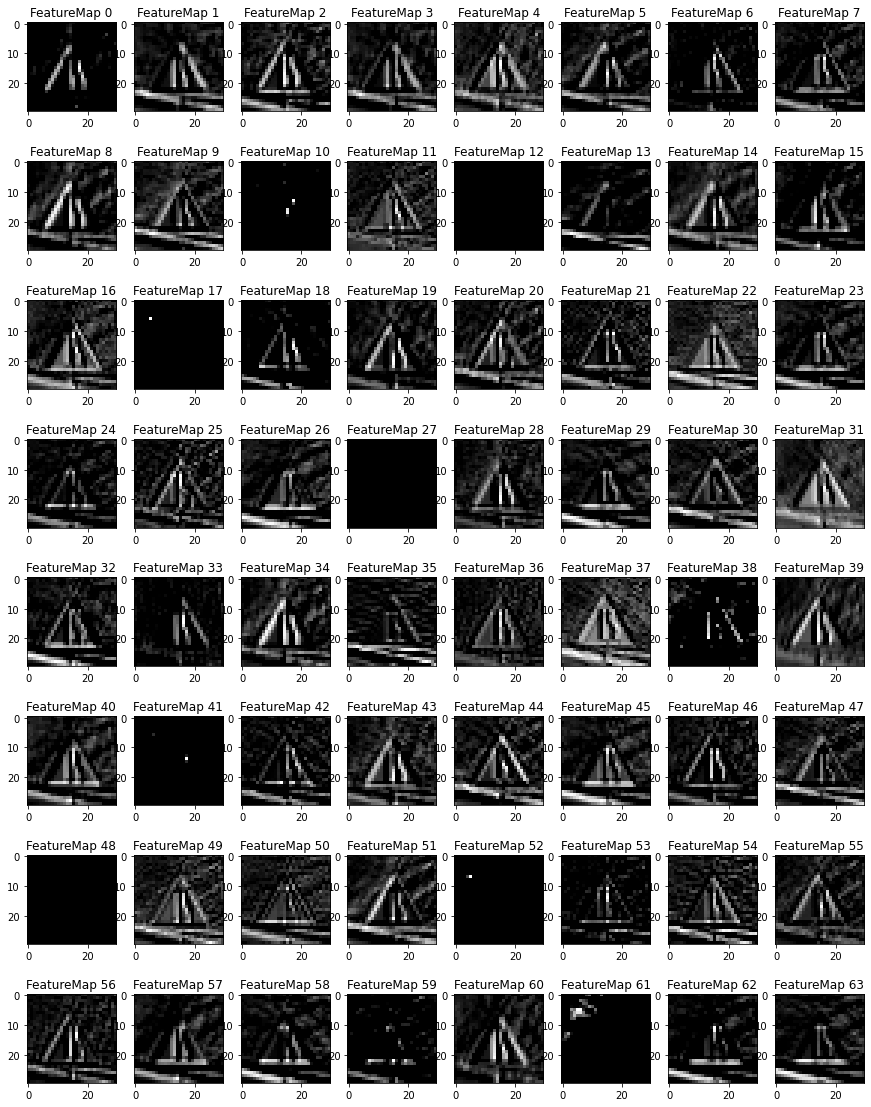

In [63]:
compute_feature_map(x_grayscale_external_test[0:1], con2d_1_relu, './trafficSignClassifier')

INFO:tensorflow:Restoring parameters from ./trafficSignClassifier


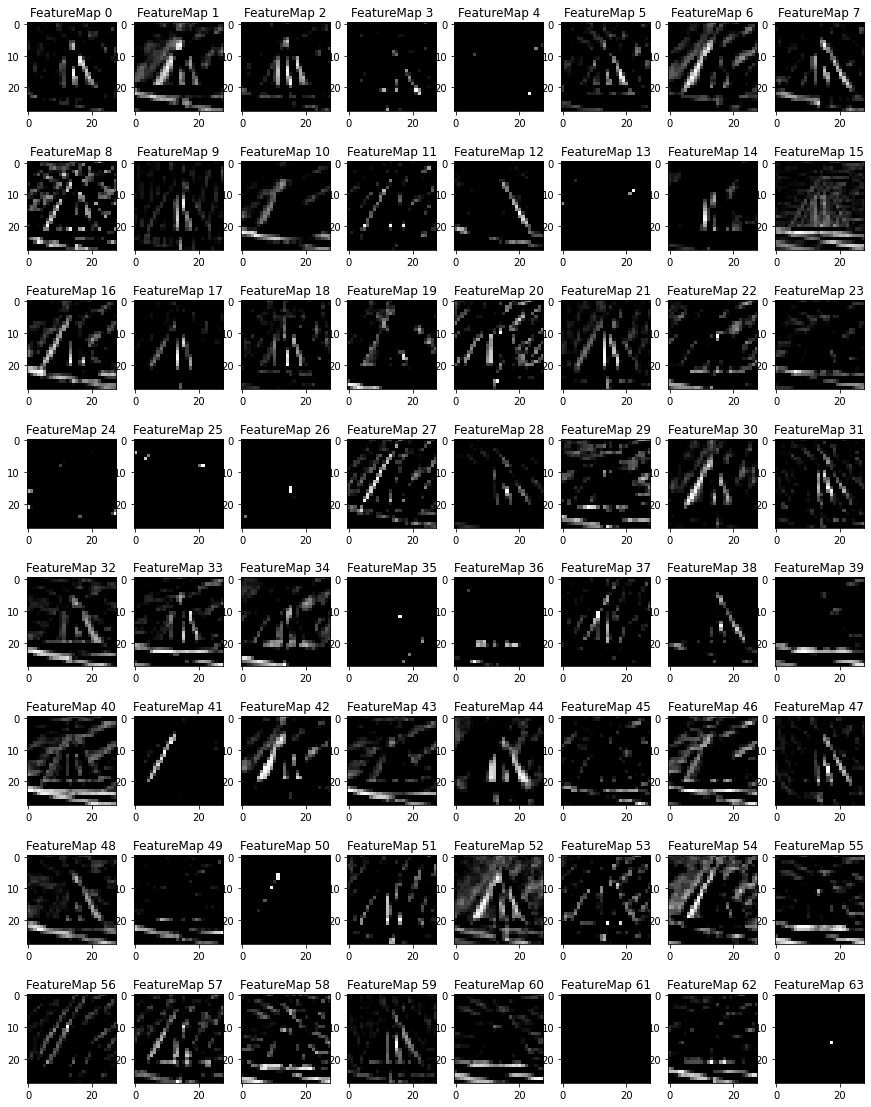

In [64]:
compute_feature_map(x_grayscale_external_test[0:1], con2d_2_relu, './trafficSignClassifier')

INFO:tensorflow:Restoring parameters from ./trafficSignClassifier


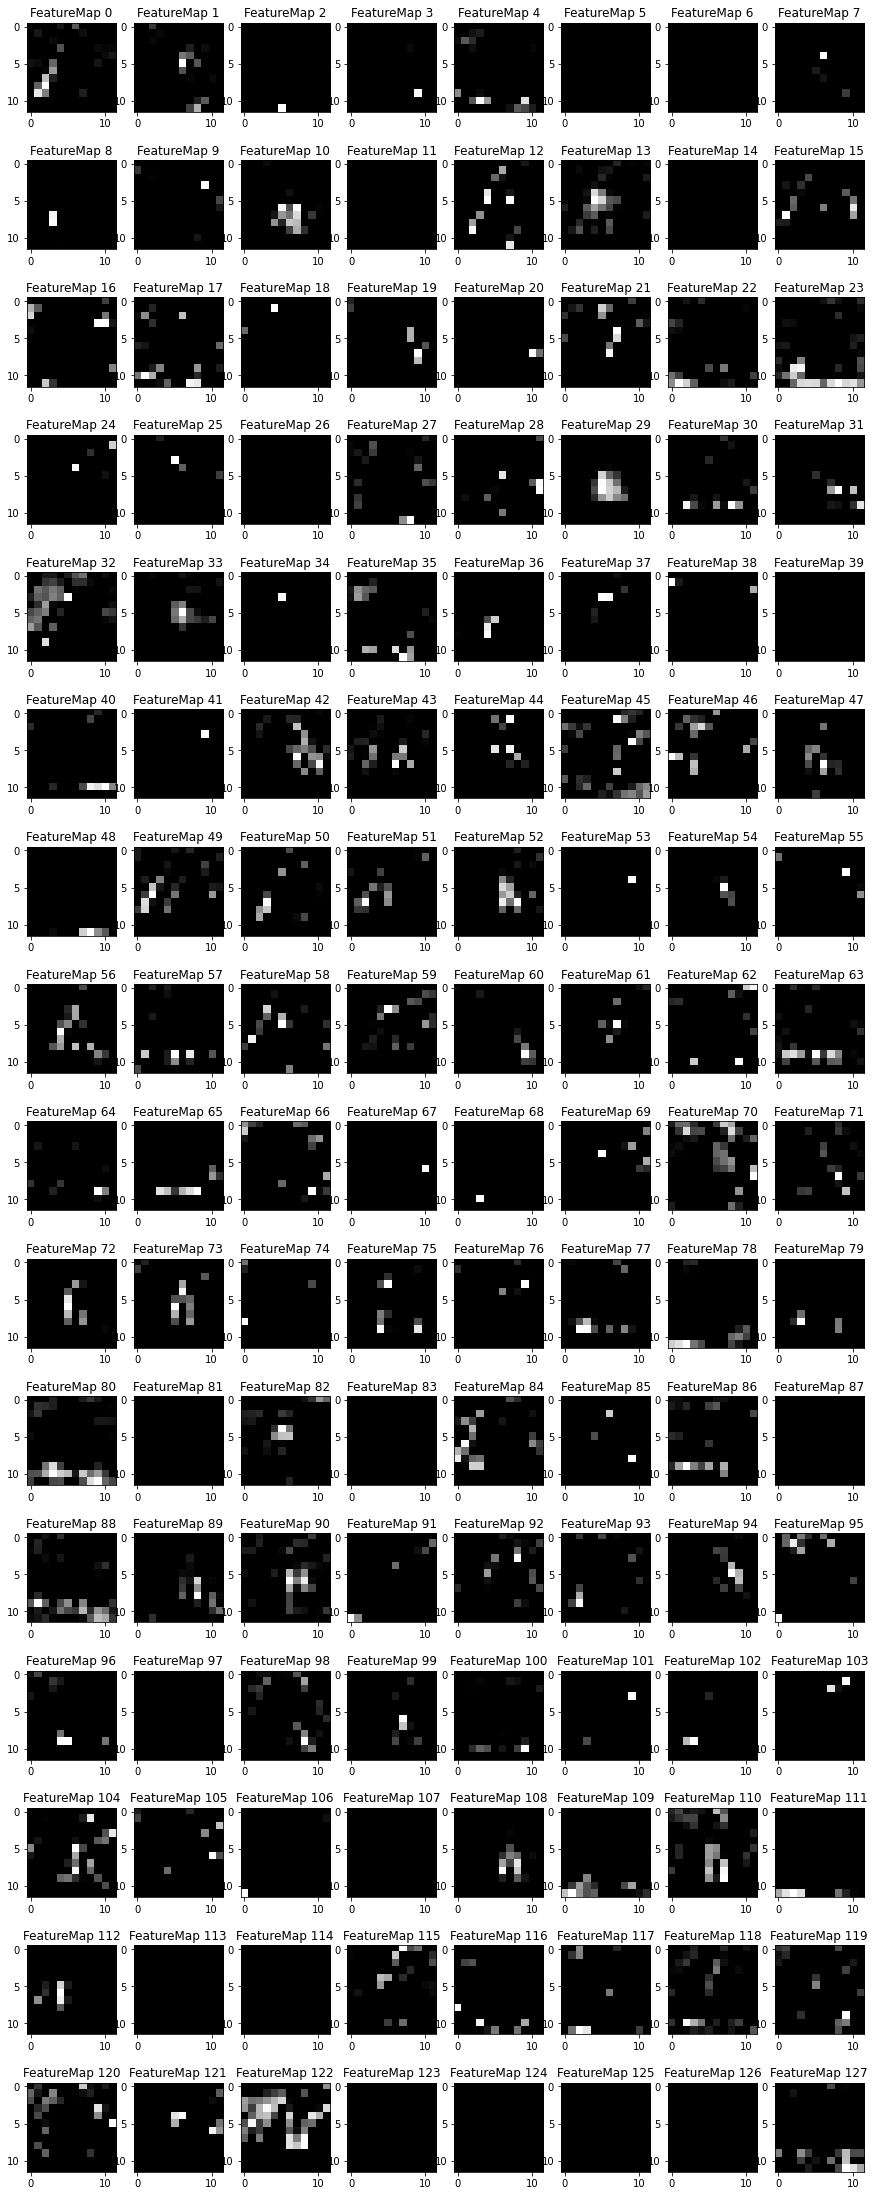

In [65]:
compute_feature_map(x_grayscale_external_test[0:1], con2d_3_relu, './trafficSignClassifier')